# Assignment 3: Linear Regression (100 points)

Only use the already imported library `numpy` and the Python standard library. Make sure that the datasets `dataLinReg2D.txt`, `dataQuadReg2D.txt` and `dataQuadReg2D_noisy.txt` are in the same directory as the notebook.


==> *Write*
* *names* Srinivas Kumar Ramdas, Benedikt Riegel, Fozan Gill 
* *matr. nr.* 3513675, 3568633, 3437081
* *study program* Computer Science, Computer Science, Computer Science
* *B.Sc./M.Sc.* M.Sc., M.Sc, M.Sc

*of all assignment group participants here. (double klick here to edit)*

## Task 1: Linear Regression - theory (10 points)
1) *(4 points)* Linear regression can have nonlinear input features, why is it still called linear regression? In what sense is it linear?

==> Since we are using linear functions, to predict the correct output y for an input x. The parameters $\beta$ are unkown to use, but we try to approximate them as good as possible (linear model). (It is linear in the effect of parameters.)

2) *(3 points)* For calculating optimal parameters $\hat{\beta}$ the inverse of $X^{\top}X$ has to be calculated. When would this matrix be singular?

==> If one 

3) *(3 points)* Why does the optimization problem for $L_1$-regularization (Lasso) not have a closed form solution?

==> *Write your response here.* (double klick here to edit)

## Task 2: Ridge Regression for Polynomial 2D Functions (70 points)
Each line in the data sets consists of a data entry `(x,y)` with a 2D point `x` and a 1D function output `y`.

In [9]:
# Load required packages and datasets. Do not modify.
import numpy as np


def load_dataset(path):
    data = np.loadtxt(path)
    X, y = data[:, :2], data[:, 2]
    
    return X, y
    

X_lin, y_lin = load_dataset("dataLinReg2D.txt")
X_quad, y_quad = load_dataset("dataQuadReg2D.txt")
X_noise, y_noise = load_dataset("dataQuadReg2D_noisy.txt")

1) *(5 points)* Draw random samples from the dataset for training, use 70% of the data. Do not modify the interface of the function. Do this for `X_quad` and `X_noise`.

In [42]:
def train_split(X, y, test_split = 0.7):
    """
    Returns X_train, y_train
        where X_train are random samples of X and y_train are the corresponding true values.
        test_split represents the persentage of how many training samples are drawn from X.
    """
    # Implement your solution here.
    # create an np.array, containing 0, 1, 2, ..., len(X)
    indices = np.arange(len(X))
    # randomly shuffle the indices
    indices = np.random.permutation(indices)
    # only take test_split % many indices
    indices = indices[:int(len(indices) * test_split)]
    # write corresponding values of X and y of the random test_split % many indices into the train dataset
    X_train = np.array([X[i] for i in indices])
    y_train = np.array([y[i] for i in indices])
    
    return X_train, y_train

X_quad_train, y_quad_train = train_split(X_quad, y_quad)
X_noise_train, y_noise_train = train_split(X_noise, y_noise)

2) *(10 points)* Extend the `make_features` method to also compute quadratic features (`ftype = 'quad'`).

In [15]:
def make_features(X, ftype='lin'):
    """
    generates features from input data, returns Phi.
    ftype is used to distinguish types of features
    """
    n, d = X.shape

    if ftype == 'lin':
        # Linear feature transformation (including intercept)
        Phi = np.empty((n, d + 1))
        Phi[:, 0] = 1
        Phi[:, 1:] = X

    elif ftype == 'quad':
        # Quadratic feature transformation
        Phi = np.empty((n, d + 1 + int(d*(d+1)/2)))
        Phi[:, 0] = 1
        Phi[:, 1:d+1] = X
        index = d+1
        values = X
        # print('phi shape: ' + str(Phi.shape))
        while values.shape[1] != 0:
            for j in range(n):
                # print(values[j, :] * values[j, 0])
                Phi[j, index:index + values.shape[1]] = values[j, :] * values[j, 0]
            # print('Phi: ' + str(Phi))
            index += values.shape[1]
            values = values[:, 1:]
        # Implement your solution here.
        pass

    else:
        raise Exception(f'Feature type {ftype} not implemented yet')

    return Phi

3) *(10 points)* Implement Ridge Regression to fit a polynomial function to the data sets with the regularization parameter `lambda_` and feature type `ftype`.

Fill out the methods in `RidgeRegression` to train (`fit`) and predict (`predict`). Feel free to introduce new fields and methods based on your needs, but the methods `fit` and `predict` are required and their interface should not be changed. You need to store the vector of regression coefficients in the field `self.beta`. Before calculating the inverse check if the determinant is non-zero.

In [12]:
class RidgeRegression(object):
    def __init__(self, lambda_, ftype='lin'):
        self.lambda_ = lambda_
        self.ftype = ftype
        self.beta = None  # Learned regression coefficients.

    def fit(self, X, y):
        """
        X is an array of shape (n, d),
            where n is the number of samples and d is the number of features.
        y is an array of shape (n,)
        """

        Phi = make_features(X, self.ftype)

        # Implement your solution here.
        # beta = (XT X + lam I)-1 XT y
        # Phi is our new X
        Phi_transpose = Phi.transpose()
        squarePhi = np.dot(Phi_transpose, Phi)
        lamI = self.lambda_ * np.identity(squarePhi.shape[0])
        # matrix_A = XT X + lam I
        matrix_A = np.add(squarePhi, lamI)
        det_A = np.linalg.det(matrix_A)
        if det_A == 0:
            print("Can't fit, because the determinant is 0")
        else:
            inv_A = np.linalg.inv(matrix_A)
            self.beta = np.dot(np.dot(inv_A, Phi_transpose), y)

    def predict(self, X):
        """
        X is an array with shape (n, d).
        The method returns an array of shape (n,).
        """
        Phi = make_features(X, self.ftype)

        # Implement your solution here.
        # y = X * beta
        # Phi is our new X

        return np.dot(Phi, self.beta)

4) *(5 points)* Implement the function `MSE` to compute the mean squared error. `y_pred` and `y_true` are the vectors of predicted and true function outputs respectively with shape `(n,)`, where `n` is the number of samples. The function returns a single float.

In [13]:
def MSE(y_pred, y_true):
    """
    return the mean squared error of y_pred and y_true
    """
    # Implement your solution here.
    # Since y_pred and y_true both have the shape (n,), i.e. we have n true values and n predicted values and each
    # value is one dimensional, we can do the following:
    return (np.square(y_true - y_pred)).mean()

5) *(30 points)* Evaluate your Ridge Regression model with linear features on the linear `(X_lin, y_lin)` data set. Report the MSE on the full data set when trained on the full dataset. Repeat this for different Ridge regularization parameters `lambda_` and generate a nice plot of the MSE for various `lambda_`. Plot the values of `lambda_` on the x-axis on a logarithmical scale and the error on the y-axis. print the minimal `lambda_`.

How does it perform with quadratic features on this data set?

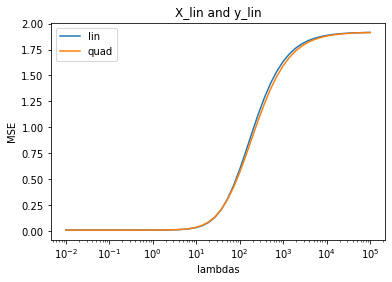

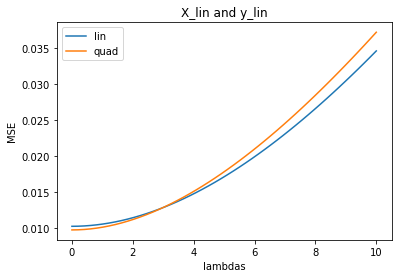

MSE: 0.010248012801650613, feature type: lin
MSE: 0.00974552060801678, feature type: quad


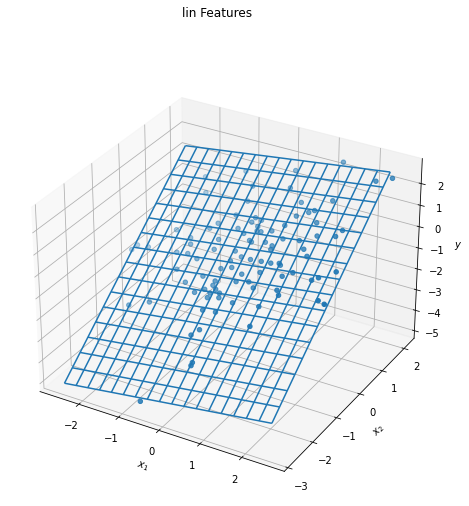

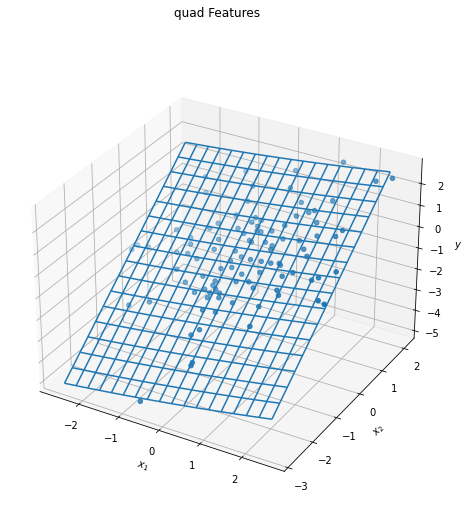

min lam for ftype lin: 0.01
min lam for ftype quad: 0.01
opt lam for ftype lin: 0.01
opt lam for ftype quad: 0.01


In [46]:
import matplotlib.pyplot as plt

def train_evaluate(regression_model, X, y):
    """
    Use X and y to fit the regression_model and make prediction over the same dataset.
    Print the error
    """
    regression_model.fit(X, y)
    yhat = regression_model.predict(X)
    print(f'MSE: {MSE(yhat, y)}, feature type: {regression_model.ftype}')
    
def plot_data_and_model(regression_model, X, y):
    """
    Generates a 3D plot of the regression result including the true underlying data.
    The data points are indicated by circles, the prediction is shown as a surface
    """
    fig = plt.figure(figsize=(8, 8))
    plt.suptitle(f'{regression_model.ftype} Features')
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(X[:, 0], X[:, 1], y, marker = 'o')
    
    x_min = X.min(0)
    x_max = X.max(0)

    x0_grid, x1_grid = np.mgrid[x_min[0]:x_max[0]:.3, x_min[1]:x_max[1]:.3]

    x_dim_0, x_dim_1 = np.shape(x0_grid)
    x_size = np.size(x0_grid)

    x0_hat = x0_grid.flatten()
    x1_hat = x1_grid.flatten()
    x0_hat = x0_hat.reshape((np.size(x0_hat), 1))
    x1_hat = x1_hat.reshape((np.size(x1_hat), 1))
    x_hat = np.append(x0_hat, x1_hat, 1)
    x_hat_fv = make_features(x_hat, regression_model.ftype)
    y_hat = x_hat_fv.dot(regression_model.beta)
    y_grid = y_hat.reshape((x_dim_0, x_dim_1))
    ax.plot_wireframe(x0_grid, x1_grid, y_grid)
    ax.auto_scale_xyz([x_min[0], x_max[0]], [x_min[1], x_max[1]], [y.min(), y.max()])
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')
    
# Implement your solution here.
# I added a return to the function train evaluate, I hope that was how it was intended
def train_getMSE(regression_model, X_train, y_train, X_eval, y_eval):
    regression_model.fit(X_train, y_train)
    yhat = regression_model.predict(X_eval)
    return MSE(yhat, y_eval)


def plot_loglams_and_min_opt_lam(X_train, y_train, X_eval, y_eval, low, high, ftype):
    lams = np.logspace(low, high)
    y = [train_getMSE(RidgeRegression(lam, ftype=ftype), X_train, y_train, X_eval, y_eval) for lam in lams]
    y = np.array(y)
    plt.plot(lams, y, label=ftype)
    plt.xscale('log', base=10)
    plt.xlabel('lambdas')
    plt.ylabel('MSE')
    # min MSE index
    min_index = y.argmin()
    return lams[0], lams[min_index]


def plot_linlams(X_train, y_train, X_eval, y_eval, low, high, ftype):
    lams = np.linspace(low, high)
    y = [train_getMSE(RidgeRegression(lam, ftype=ftype), X_train, y_train, X_eval, y_eval) for lam in lams]
    plt.plot(lams, y, label=ftype)
    plt.xlabel('lambdas')
    plt.ylabel('MSE')
    
def plot_stuff_lin():
    (minLin, optLin) = plot_loglams_and_min_opt_lam(X_lin, y_lin, X_lin, y_lin, -2, 5, 'lin')
    (minQuad, optQuad) = plot_loglams_and_min_opt_lam(X_lin, y_lin,X_lin, y_lin, -2, 5, 'quad')
    plt.legend()
    plt.title('X_lin and y_lin')
    plt.show()
    
    plot_linlams(X_lin, y_lin, X_lin, y_lin, 0, 10, 'lin')
    plot_linlams(X_lin, y_lin, X_lin, y_lin, 0, 10, 'quad')
    plt.legend()
    plt.title('X_lin and y_lin')
    plt.show()
    
    lin_regression = RidgeRegression(optLin, ftype='lin')
    train_evaluate(lin_regression, X_lin, y_lin)
    quad_regression = RidgeRegression(optQuad, ftype='quad')
    train_evaluate(quad_regression, X_lin, y_lin)
    plot_data_and_model(lin_regression, X_lin, y_lin)
    plt.show()
    plot_data_and_model(quad_regression, X_lin, y_lin)
    plt.show()
    
    print('min lam for ftype lin: ' + str(minLin))
    print('min lam for ftype quad: ' + str(minQuad))
    print('opt lam for ftype lin: ' + str(optLin))
    print('opt lam for ftype quad: ' + str(optQuad))
    
plot_stuff_lin()

6) *(5 points)* Evaluate the quadratic dataset `(X_quad, y_quad)` for different values of `lambda_`. Report the MSE on the full data set when trained on the partial dataset `(X_quad_train, y_quad_train)`. Repeat this for different Ridge regularization parameters `lambda_` and generate a nice plot of the MSE for various `lambda_`. Plot the values of `lambda_` on the x-axis on a logarithmical scale and the error on the y-axis. print the minimal `lambda_`.

Plot the surface and data points of the best `lambda_` value using the function `plot_data_and_model`.

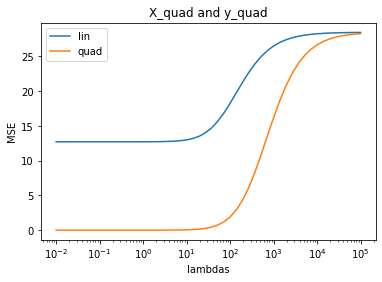

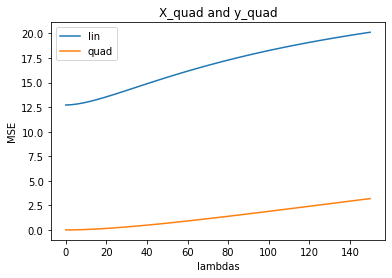

MSE: 12.280479817971248, feature type: lin
MSE: 0.012443830320963445, feature type: quad


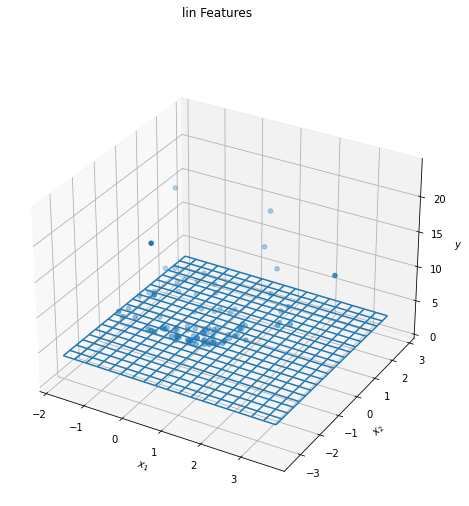

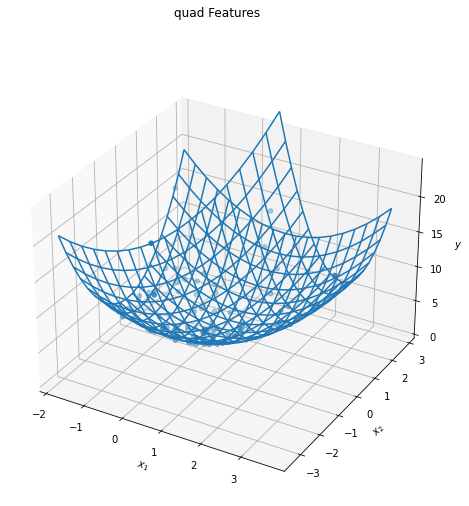

min lam for ftype lin: 0.01
min lam for ftype quad: 0.01
opt lam for ftype lin: 0.01
opt lam for ftype quad: 0.01


In [47]:
# Implement your solution here.
def plot_stuff_quad():
    X_train, y_train = train_split(X_quad, y_quad)
    (minLin, optLin) = plot_loglams_and_min_opt_lam(X_train, y_train, X_quad, y_quad, -2, 5, 'lin')
    (minQuad, optQuad) = plot_loglams_and_min_opt_lam(X_train, y_train, X_quad, y_quad, -2, 5, 'quad')
    plt.legend()
    plt.title('X_quad and y_quad')
    plt.show()
    
    plot_linlams(X_train, y_train, X_quad, y_quad, 0, 150, 'lin')
    plot_linlams(X_train, y_train, X_quad, y_quad, 0, 150, 'quad')
    plt.legend()
    plt.title('X_quad and y_quad')
    plt.show()
    
    lin_regression = RidgeRegression(optLin, ftype='lin')
    train_evaluate(lin_regression, X_train, y_train)
    quad_regression = RidgeRegression(optQuad, ftype='quad')
    train_evaluate(quad_regression, X_train, y_train)
    
    plot_data_and_model(lin_regression, X_quad, y_quad)
    plt.show()
    plot_data_and_model(quad_regression, X_quad, y_quad)
    plt.show()
    
    print('min lam for ftype lin: ' + str(minLin))
    print('min lam for ftype quad: ' + str(minQuad))
    print('opt lam for ftype lin: ' + str(optLin))
    print('opt lam for ftype quad: ' + str(optQuad))

plot_stuff_quad()

7) *(5 points)* Evaluate the noisy dataset `(X_noise, y_noise)` for different values of `lambda_`. Report the MSE on the full data set when trained on the partial dataset `(X_noise_train, y_noise_train)`. Repeat this for different Ridge regularization parameters `lambda_` and generate a nice plot of the MSE for various `lambda_`. Plot the values of `lambda_` on the x-axis on a logarithmical scale and the error on the y-axis.

Plot the surface and data points of the best `lambda_` value using the function `plot_data_and_model`.

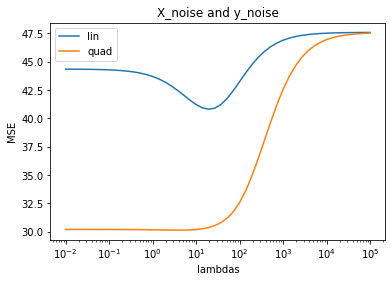

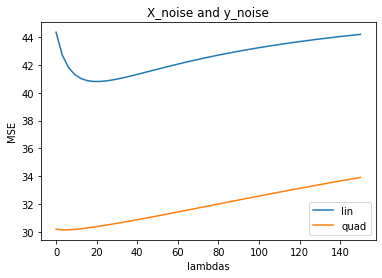

MSE: 40.56096046474498, feature type: lin
MSE: 29.537738715592255, feature type: quad


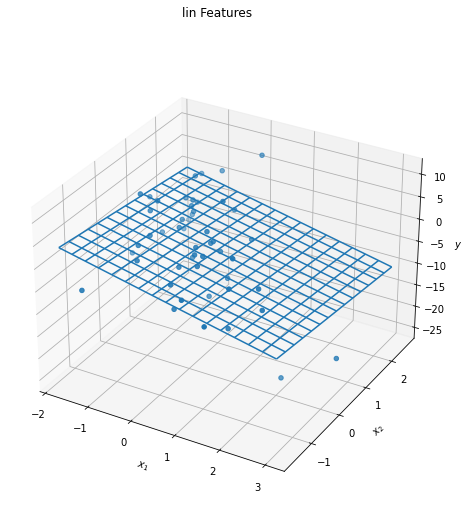

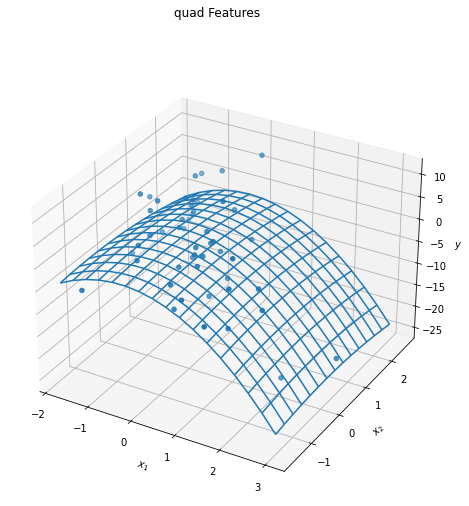

min lam for ftype lin: 0.01
min lam for ftype quad: 0.01
opt lam for ftype lin: 19.306977288832496
opt lam for ftype quad: 3.727593720314938


In [49]:
# Implement your solution here.
def plot_stuff_noise():
    X_train, y_train = train_split(X_noise, y_noise)
    
    (minLin, optLin) = plot_loglams_and_min_opt_lam(X_train, y_train, X_noise, y_noise, -2, 5, 'lin')
    (minQuad, optQuad) = plot_loglams_and_min_opt_lam(X_train, y_train, X_noise, y_noise, -2, 5, 'quad')
    plt.legend()
    plt.title('X_noise and y_noise')
    plt.show()
    
    plot_linlams(X_train, y_train, X_noise, y_noise, 0, 150, 'lin')
    plot_linlams(X_train, y_train, X_noise, y_noise, 0, 150, 'quad')
    plt.legend()
    plt.title('X_noise and y_noise')
    plt.show()
    
    lin_regression = RidgeRegression(optLin, ftype='lin')
    train_evaluate(lin_regression, X_train, y_train)
    quad_regression = RidgeRegression(optQuad, ftype='quad')
    train_evaluate(quad_regression, X_train, y_train)
    plot_data_and_model(lin_regression, X_noise, y_noise)
    plt.show()
    plot_data_and_model(quad_regression, X_noise, y_noise)
    plt.show()
    
    print('min lam for ftype lin: ' + str(minLin))
    print('min lam for ftype quad: ' + str(minQuad))
    print('opt lam for ftype lin: ' + str(optLin))
    print('opt lam for ftype quad: ' + str(optQuad))
    
plot_stuff_noise()

## Task 3 Evaluation (20 points)

1) *(5 points)* What was the best choice for regularization term `lambda_` in the models above? Explain the observation from the previous task? If `lambda_` is set to zero $\hat{\beta}$ is not regularized, when would $\lambda = 0$ be a good choice?

==> *Briefly explain the observation from the previous task.* (double klick here to edit)

**For all students other than B.Sc. Data Science:** 

2) *(15 points)* Implement the function `cross_validation` for `k_fold = 10` to evaluate the prediction error of your model. Report the mean squared error from cross-validation. Repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`. Plot the values of `lambda_` on the x-axis on a logarithmical scale and the error on the y-axis. 

In [9]:
def cross_validation(regression_model, X, y, k_fold = 10):
    """
    partition data X in k_fold equal sized subsets D = {D_1, ..., D_{k_fold}}, 
        fit the model on k_fold-1 subsets (D\D_i), 
        compute MSE on the evaluatin set (D_i),
        return the mean MSE over all subsets D
    """
    return None